# Data Visualization

This notebook demonstrates some data visualization methods, using the Pandas data science library for Python, its built-in instance of Matplotlib, a data visualization library, and Altair, a declarative data science library. 

To prepare, we've downloaded the IMDB data set [here from Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv), and by clicking "download." What we download to our computer is `archive.zip`. 

We then upload that file to our Colab notebook in the files explorer (the tab on the left), using the upload button.

Now, let's import Pandas and Altair: 

In [74]:
import pandas as pd
import altair as alt

You can run shell commands (Ubuntu Linux programs) in your Google-provided virtual machine by prefixing the command with `!`. So to run the command `echo` and give it the input "Hello world!," run this: 

In [ ]:
!echo "Hello world!"

Hello world!


We'll use the `unzip` command to unzip our archive:

In [ ]:
!unzip archive.zip 

Archive:  archive.zip
  inflating: IMDb movies.csv         
  inflating: IMDb names.csv          
  inflating: IMDb ratings.csv        
  inflating: IMDb title_principals.csv  


That expands several CSV files, which we'll load in one by one. 

In [ ]:
movies = pd.read_csv('IMDb movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movies

In [ ]:
ratings = pd.read_csv('IMDb ratings.csv')

A CSV is just a comma-separated-values text file. 

In [ ]:
rawCSV = """
movie,rating,budget
Star Wars,10,100000000
Star Wars II,2,5
"""

Let's merge these two CSV files together, and assign them to the variable `df`. 

In [24]:
df = pd.merge(movies, ratings)

In [ ]:
df

## On Data Visualization Libraries

- Matplotlib: the oldest, (clunkiest?), imperative library, built into Pandas
- Altair: newer, uses Vega, declarative, works well with data frames 
- Plotly: newer, interactive, declarative, works well with data frames

## Matplotlib and built-in Pandas visualizations

In [28]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes'

In [ ]:
df['avg_vote'].plot(kind='bar')

In [37]:
df['year'].apply(int)


ValueError: ignored

That doesn't work, so we have to clean `year` so that it's all `int`s. 

In [38]:
def strToIntAwesome(year):
    if type(year) == str and year.startswith('TV Movie'): 
        year = year[-4:]
    return int(year)

Testing with lots of different years: 

In [43]:
testStrings = ["2021", "2", "45", "1911", "1900", "TV Movie 2019"]
for year in testStrings:
    print(strToIntAwesome(year))

2021
2
45
1911
1900
2019


Now we can apply the function to `year` to get `cleanYear`. 

In [48]:
df['cleanYear'] = df['year'].apply(strToIntAwesome)

In [60]:
df['cleanYear']

0        1894
1        1906
2        1911
3        1912
4        1911
         ... 
85850    2020
85851    2020
85852    2019
85853    2019
85854    2019
Name: cleanYear, Length: 85855, dtype: int64

That allows us to get the mean vote (rating) by year: 

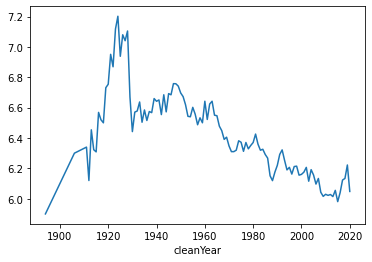

In [71]:
df.groupby('cleanYear')['mean_vote'].mean().plot()

Here's how we would bin this into decades, if we wanted: 

In [100]:
def yearToDecade(year): 
    return year - year % 10

Testing: 

In [102]:
for year in [1910, 1900, 2, 8546]:
    print(yearToDecade(year))

1910
1900
0
8540


Now we apply our decading function to `cleanYear`:

In [104]:
df['decade'] = df['cleanYear'].apply(yearToDecade)

Now before we get to decades, let's group by our years. First, tidy the data: 

In [76]:
yearVRating = df.groupby('cleanYear')['mean_vote'].mean()

In [86]:
yearVRatingClean = yearVRating.to_frame()

In [90]:
yearVRatingClean['cleanYear'] = yearVRating.index

In [95]:
yearVRatingClean

,mean_vote,cleanYear
cleanYear,,
1894,5.900000,1894
1906,6.300000,1906
1911,6.340000,1911
1912,6.120000,1912
1913,6.453846,1913
...,...,...
2016,6.039866,2016
2017,6.123040,2017
2018,6.133773,2018


Now plot it. `O` is for ordinal data. `Q` is for quantitative. 

In [96]:
alt.Chart(yearVRatingClean).mark_line().encode(x='cleanYear:O', y='mean_vote:Q')

alt.Chart(...)

In [109]:
yearVRating = df.groupby('decade')['mean_vote'].mean()

In [110]:
yearVRatingClean = yearVRating.to_frame()

In [111]:
yearVRatingClean['decade'] = yearVRating.index

In [112]:
yearVRatingClean

,mean_vote,decade
decade,,
1890,5.900000,1890
1900,6.300000,1900
1910,6.511765,1910
1920,6.942645,1920
1930,6.567749,1930
1940,6.675446,1940
1950,6.570785,1950
1960,6.515707,1960
1970,6.339554,1970


In [114]:
alt.Chart(yearVRatingClean).mark_line().encode(x='decade:O', y='mean_vote:Q').interactive()

alt.Chart(...)

In [118]:
df[['country', 'mean_vote']].groupby('country')['mean_vote'].mean().sort_values(ascending=False)

country
Panama, USA, Argentina                               9.4
Russia, Ukraine, Czech Republic, Japan               9.4
Russia, Belgium, Spain, Ukraine                      9.4
Uzbekistan, Russia                                   9.2
Spain, Russia                                        9.2
                                                    ... 
South Africa, UK, USA                                2.0
India, China, United Arab Emirates, USA, Malaysia    2.0
Hungary, Serbia                                      1.9
Belgium, Japan                                       1.6
USA, Argentina, South Africa, Japan, Israel          1.3
Name: mean_vote, Length: 4907, dtype: float64

In [121]:
def firstCountry(country): 
    if type(country) != str: 
        country = ""
    firstCountry = country.split(',')[0]
    return firstCountry

In [123]:
df['cleanCountry'] = df['country'].apply(firstCountry)

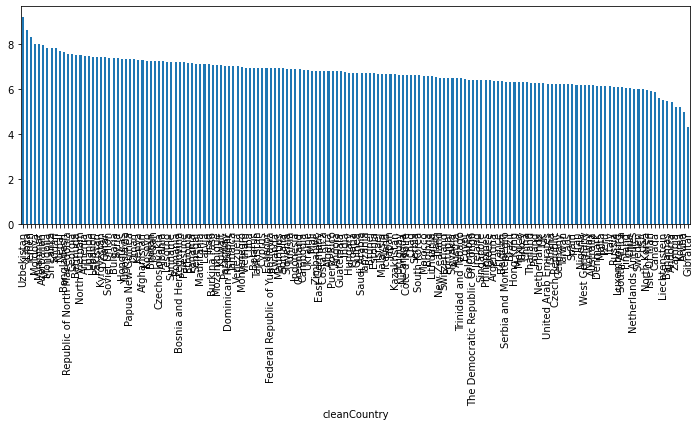

In [135]:
df.groupby('cleanCountry')['mean_vote'].mean(
    ).sort_values(ascending=False).plot(kind='bar', figsize=(12,4))

In [132]:
myColumns = ['cleanCountry', 'decade']

In [133]:
df[myColumns]

,cleanCountry,decade
0,USA,1890
1,Australia,1900
2,Germany,1910
3,USA,1910
4,Italy,1910
...,...,...
85850,France,2020
85851,Netherlands,2020
85852,India,2010
85853,Turkey,2010


In [134]:
df[['cleanCountry', 'decade']]

,cleanCountry,decade
0,USA,1890
1,Australia,1900
2,Germany,1910
3,USA,1910
4,Italy,1910
...,...,...
85850,France,2020
85851,Netherlands,2020
85852,India,2010
85853,Turkey,2010


In [138]:
countryRating = df.groupby('cleanCountry')['mean_vote'].mean().sort_values(ascending=False)

In [141]:
countryRatingDf = countryRating.to_frame()
countryRatingDf['cleanCountry'] = countryRatingDf.index

In [144]:
countryRatingDf.sort_values('mean_vote')

,mean_vote,cleanCountry
cleanCountry,,
Gibraltar,4.30,Gibraltar
Aruba,4.95,Aruba
Zambia,5.20,Zambia
Korea,5.20,Korea
Andorra,5.40,Andorra
...,...,...
Myanmar,8.00,Myanmar
Moldova,8.00,Moldova
Yemen,8.30,Yemen


In [147]:
countryRatingDf = countryRatingDf.sort_values('mean_vote')

In [148]:
countryRatingDf

,mean_vote,cleanCountry
cleanCountry,,
Gibraltar,4.30,Gibraltar
Aruba,4.95,Aruba
Zambia,5.20,Zambia
Korea,5.20,Korea
Andorra,5.40,Andorra
...,...,...
Myanmar,8.00,Myanmar
Moldova,8.00,Moldova
Yemen,8.30,Yemen


In [ ]:
alt.Chart(countryRatingDf).mark_bar().encode(x='mean_vote:Q', y='cleanCountry').interactive()